## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results,
                                how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
mouse_study["Mouse ID"].nunique()

249

In [6]:
mouse_study# 1892 ROWS OF VALUES, 1 HEADER ROW

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
mouse_study.value_counts()

Mouse ID  Drug Regimen  Sex     Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
g989      Propriva      Female  21          26          0          45.000000           0                   2
a203      Infubinol     Female  20          23          0          45.000000           0                   1
q597      Ramicane      Male    20          25          40         44.471821           2                   1
q633      Zoniferol     Male    12          25          10         49.001866           0                   1
                                                        5          47.183802           0                   1
                                                                                                          ..
i177      Ramicane      Male    10          18          45         33.562402           3                   1
                                                        40         35.557933           2                   1
                        

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# mouse_study.drop_duplicates(subset=["Mouse ID"], keep='last')#DID NOT WORK!
# mouse_study.drop_duplicates()#DID NOT WORK!



In [9]:
mouse_study.drop_duplicates(keep='last')#DID NOT WORK!

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
mouse_study.value_counts()#DUPLICATE SHOWS UP HERE FIRST!

Mouse ID  Drug Regimen  Sex     Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
g989      Propriva      Female  21          26          0          45.000000           0                   2
a203      Infubinol     Female  20          23          0          45.000000           0                   1
q597      Ramicane      Male    20          25          40         44.471821           2                   1
q633      Zoniferol     Male    12          25          10         49.001866           0                   1
                                                        5          47.183802           0                   1
                                                                                                          ..
i177      Ramicane      Male    10          18          45         33.562402           3                   1
                                                        40         35.557933           2                   1
                        

In [11]:
mouse_dup = mouse_study.groupby(["Mouse ID"])["Timepoint"].count()
mouse_dup

Mouse ID
a203    10
a251    10
a262    10
a275    10
a366     7
        ..
z435     3
z578    10
z581    10
z795    10
z969    10
Name: Timepoint, Length: 249, dtype: int64

In [12]:
# mouse_duplicate = mouse_study.loc[(mouse_study["Mouse ID"].value_counts()), :]#DID NOT HELP!
# mouse_duplicate

In [13]:
# mouse_study["Timepoint"].value_counts()#DID NOT HELP!

In [14]:
mouse_study["Mouse ID"].value_counts()# THIS IS WHERE DUPLICATE WAS FOUND!

g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [15]:
mouse_study["Drug Regimen"].value_counts()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug Regimen, dtype: int64

In [16]:
mouse_study["Drug Regimen"].nunique()

10

In [17]:
mouse_study.loc[mouse_study["Mouse ID"]=="g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [18]:
# mouse_id = mouse_duplicate.drop_duplicates()#DID NOT WORK!
# mouse_id

In [19]:
# Groupby and sort by max so largest tumor volume can be kept while dropping the other duplicates
mouse_unique = mouse_study.groupby(["Mouse ID", "Drug Regimen", "Sex", "Age_months",
                                    "Weight (g)", "Timepoint",
                                   "Metastatic Sites"], as_index=False)["Tumor Volume (mm3)"].max()
mouse_unique

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Metastatic Sites,Tumor Volume (mm3)
0,a203,Infubinol,Female,20,23,0,0,45.000000
1,a203,Infubinol,Female,20,23,5,0,48.508468
2,a203,Infubinol,Female,20,23,10,1,51.852437
3,a203,Infubinol,Female,20,23,15,1,52.777870
4,a203,Infubinol,Female,20,23,20,1,55.173336
...,...,...,...,...,...,...,...,...
1884,z969,Naftisol,Male,9,30,25,2,63.145652
1885,z969,Naftisol,Male,9,30,30,3,65.841013
1886,z969,Naftisol,Male,9,30,35,4,69.176246
1887,z969,Naftisol,Male,9,30,40,4,70.314904


In [20]:
mouse_unique.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Metastatic Sites        int64
Tumor Volume (mm3)    float64
dtype: object

In [21]:
# Optional: Get all the data for the duplicate mouse ID.
mouse_unique.loc[mouse_unique["Mouse ID"]=="g989"]# DUPLICATE Timepoint = 15 (9 ROWS FOR g989)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Metastatic Sites,Tumor Volume (mm3)
586,g989,Propriva,Female,21,26,0,0,45.000000
587,g989,Propriva,Female,21,26,5,0,48.786801
588,g989,Propriva,Female,21,26,10,0,51.745156
589,g989,Propriva,Female,21,26,15,0,53.442020
590,g989,Propriva,Female,21,26,15,1,51.325852
591,g989,Propriva,Female,21,26,20,1,55.326122
592,g989,Propriva,Female,21,26,25,1,56.045564
593,g989,Propriva,Female,21,26,30,1,59.082294
594,g989,Propriva,Female,21,26,35,2,62.570880


In [22]:
mouse_unique = mouse_unique.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep='first')
mouse_unique

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Metastatic Sites,Tumor Volume (mm3)
0,a203,Infubinol,Female,20,23,0,0,45.000000
1,a203,Infubinol,Female,20,23,5,0,48.508468
2,a203,Infubinol,Female,20,23,10,1,51.852437
3,a203,Infubinol,Female,20,23,15,1,52.777870
4,a203,Infubinol,Female,20,23,20,1,55.173336
...,...,...,...,...,...,...,...,...
1884,z969,Naftisol,Male,9,30,25,2,63.145652
1885,z969,Naftisol,Male,9,30,30,3,65.841013
1886,z969,Naftisol,Male,9,30,35,4,69.176246
1887,z969,Naftisol,Male,9,30,40,4,70.314904


In [23]:
mouse_unique.loc[mouse_unique["Mouse ID"]=="g989"]#DUPLICATE GONE FOR g989 (8 ROWS NOW)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Metastatic Sites,Tumor Volume (mm3)
586,g989,Propriva,Female,21,26,0,0,45.000000
587,g989,Propriva,Female,21,26,5,0,48.786801
588,g989,Propriva,Female,21,26,10,0,51.745156
589,g989,Propriva,Female,21,26,15,0,53.442020
591,g989,Propriva,Female,21,26,20,1,55.326122
592,g989,Propriva,Female,21,26,25,1,56.045564
593,g989,Propriva,Female,21,26,30,1,59.082294
594,g989,Propriva,Female,21,26,35,2,62.570880


In [24]:
mouse_unique.value_counts()

Mouse ID  Drug Regimen  Sex     Age_months  Weight (g)  Timepoint  Metastatic Sites  Tumor Volume (mm3)
a203      Infubinol     Female  20          23          0          0                 45.000000             1
q597      Ramicane      Male    20          25          40         2                 44.471821             1
q633      Zoniferol     Male    12          25          10         0                 49.001866             1
                                                        5          0                 47.183802             1
                                                        0          0                 45.000000             1
                                                                                                          ..
i334      Ramicane      Female  8           20          5          0                 41.020518             1
                                                        0          0                 45.000000             1
i177      Ramicane      

In [25]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# cleanded DataFrame by dropping duplicate Timepoint for Mouse ID = g989 and keeping the greatest tumor volume 
mouse_unique


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Metastatic Sites,Tumor Volume (mm3)
0,a203,Infubinol,Female,20,23,0,0,45.000000
1,a203,Infubinol,Female,20,23,5,0,48.508468
2,a203,Infubinol,Female,20,23,10,1,51.852437
3,a203,Infubinol,Female,20,23,15,1,52.777870
4,a203,Infubinol,Female,20,23,20,1,55.173336
...,...,...,...,...,...,...,...,...
1884,z969,Naftisol,Male,9,30,25,2,63.145652
1885,z969,Naftisol,Male,9,30,30,3,65.841013
1886,z969,Naftisol,Male,9,30,35,4,69.176246
1887,z969,Naftisol,Male,9,30,40,4,70.314904


In [26]:
# Checking the number of mice in the clean DataFrame.
mouse_unique.nunique()

Mouse ID               249
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Metastatic Sites         5
Tumor Volume (mm3)    1640
dtype: int64

In [27]:
mouse_unique.describe()

,Age_months,Weight (g),Timepoint,Metastatic Sites,Tumor Volume (mm3)
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,12.792903,25.661547,19.597458,1.023305,50.450397
std,7.186737,3.926776,14.084762,1.138751,8.904809
min,1.000000,15.000000,0.000000,0.000000,22.050126
25%,7.000000,25.000000,5.000000,0.000000,45.000000
50%,13.000000,27.000000,20.000000,1.000000,48.951421
75%,20.000000,29.000000,30.000000,2.000000,56.324075
max,24.000000,30.000000,45.000000,4.000000,78.567014


## Summary Statistics

In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
regimen_mean = mouse_unique.groupby(["Drug Regimen"], as_index=False)["Tumor Volume (mm3)"].mean()#as_index=False keeps column header for Tumor Volume
regimen_mean


,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,40.675741
1,Ceftamin,52.591172
2,Infubinol,52.884795
3,Ketapril,55.235638
4,Naftisol,54.331565
5,Placebo,54.033581
6,Propriva,52.407029
7,Ramicane,40.216745
8,Stelasyn,54.233149
9,Zoniferol,53.236507


In [29]:
type(regimen_mean)

pandas.core.frame.DataFrame

In [30]:
regimen_mean.columns = ["Drug Regimen", "mean"]
regimen_mean

,Drug Regimen,mean
0,Capomulin,40.675741
1,Ceftamin,52.591172
2,Infubinol,52.884795
3,Ketapril,55.235638
4,Naftisol,54.331565
5,Placebo,54.033581
6,Propriva,52.407029
7,Ramicane,40.216745
8,Stelasyn,54.233149
9,Zoniferol,53.236507


In [31]:
reg_med = mouse_unique.groupby(["Drug Regimen"], as_index=False)["Tumor Volume (mm3)"].median()
reg_med.columns = ["Drug Regimen", "median"]
reg_med

,Drug Regimen,median
0,Capomulin,41.557809
1,Ceftamin,51.776157
2,Infubinol,51.820584
3,Ketapril,53.698743
4,Naftisol,52.509285
5,Placebo,52.288934
6,Propriva,50.909965
7,Ramicane,40.673236
8,Stelasyn,52.431737
9,Zoniferol,51.818479


In [32]:
reg_sem = mouse_unique.groupby(["Drug Regimen"], as_index=False)["Tumor Volume (mm3)"].sem()
reg_sem.columns = ["Drug Regimen", "SEM"]
reg_sem

,Drug Regimen,SEM
0,Capomulin,0.329346
1,Ceftamin,0.469821
2,Infubinol,0.492236
3,Ketapril,0.603860
4,Naftisol,0.596466
5,Placebo,0.581331
6,Propriva,0.525859
7,Ramicane,0.320955
8,Stelasyn,0.573111
9,Zoniferol,0.516398


In [33]:
reg_var = mouse_unique.groupby(["Drug Regimen"], as_index=False)["Tumor Volume (mm3)"].var()
reg_var.columns = ["Drug Regimen", "var"]
reg_var

,Drug Regimen,var
0,Capomulin,24.947764
1,Ceftamin,39.290177
2,Infubinol,43.128684
3,Ketapril,68.553577
4,Naftisol,66.173479
5,Placebo,61.168083
6,Propriva,43.138358
7,Ramicane,23.486704
8,Stelasyn,59.450562
9,Zoniferol,48.533355


In [34]:
reg_std = mouse_unique.groupby(["Drug Regimen"], as_index=False)["Tumor Volume (mm3)"].std()
reg_std.columns = ["Drug Regimen", "std"]
reg_std

,Drug Regimen,std
0,Capomulin,4.994774
1,Ceftamin,6.268188
2,Infubinol,6.567243
3,Ketapril,8.279709
4,Naftisol,8.134708
5,Placebo,7.821003
6,Propriva,6.567980
7,Ramicane,4.846308
8,Stelasyn,7.710419
9,Zoniferol,6.966589


In [35]:
# summary_reg = pd.concat([regimen_mean, reg_med, reg_var, reg_std, reg_sem], axis=1, names="Drug Regimen")
# DID NOT WORK!  duplicagted Drug Regimen columns from each concantenated dataframe

In [36]:
summary_reg = pd.DataFrame({"Drug Regimen": regimen_mean["Drug Regimen"], "mean":regimen_mean["mean"],
                                      "median": reg_med["median"], "var":reg_var["var"],
                                      "std": reg_std["std"], "SEM": reg_sem["SEM"]})

summary_reg


,Drug Regimen,mean,median,var,std,SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.407029,50.909965,43.138358,6.567980,0.525859
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [37]:
summary_reg = round(pd.DataFrame({"Drug Regimen": regimen_mean["Drug Regimen"], "mean":regimen_mean["mean"],
                                      "median": reg_med["median"], "var":reg_var["var"],
                                      "std": reg_std["std"], "SEM": reg_sem["SEM"]}),2)

summary_reg

,Drug Regimen,mean,median,var,std,SEM
0,Capomulin,40.68,41.56,24.95,4.99,0.33
1,Ceftamin,52.59,51.78,39.29,6.27,0.47
2,Infubinol,52.88,51.82,43.13,6.57,0.49
3,Ketapril,55.24,53.70,68.55,8.28,0.60
4,Naftisol,54.33,52.51,66.17,8.13,0.60
5,Placebo,54.03,52.29,61.17,7.82,0.58
6,Propriva,52.41,50.91,43.14,6.57,0.53
7,Ramicane,40.22,40.67,23.49,4.85,0.32
8,Stelasyn,54.23,52.43,59.45,7.71,0.57
9,Zoniferol,53.24,51.82,48.53,6.97,0.52


In [38]:
reg_agg = mouse_unique.groupby(["Drug Regimen"], as_index=False)["Tumor Volume (mm3)"].agg([np.mean, np.median,
                                                                                            np.var, np.std,'sem'])
reg_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.407029,50.909965,43.138358,6.567980,0.525859
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [39]:
reg_agg = round(mouse_unique.groupby(["Drug Regimen"], as_index=False)["Tumor Volume (mm3)"].agg([np.mean, np.median,
                                                                                            np.var, np.std,'sem']),2)
reg_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.41,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


# Bar and Pie Charts

## Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.



In [40]:

# THIS GIVES CORRECT RESULTS!  # HOWEVER "Timepoint", "Mouse ID" returns deprecation message
# mouse_unique.groupby(["Drug Regimen"])["Timepoint", "Mouse ID"].sum().plot(kind='bar',
#                                                                            ylabel=["Mouse ID","Timepoint"])

In [41]:
mouse_unique.dtypes


Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Metastatic Sites        int64
Tumor Volume (mm3)    float64
dtype: object

In [42]:
mouse = mouse_unique["Mouse ID"].nunique()
mouse

249

In [43]:
mouse_unique.value_counts()

Mouse ID  Drug Regimen  Sex     Age_months  Weight (g)  Timepoint  Metastatic Sites  Tumor Volume (mm3)
a203      Infubinol     Female  20          23          0          0                 45.000000             1
q597      Ramicane      Male    20          25          40         2                 44.471821             1
q633      Zoniferol     Male    12          25          10         0                 49.001866             1
                                                        5          0                 47.183802             1
                                                        0          0                 45.000000             1
                                                                                                          ..
i334      Ramicane      Female  8           20          5          0                 41.020518             1
                                                        0          0                 45.000000             1
i177      Ramicane      

In [44]:
dmt = mouse_unique.groupby(["Drug Regimen"])["Mouse ID" and "Timepoint"].value_counts()
dmt

Drug Regimen  Timepoint
Capomulin     0            25
              5            25
              10           25
              15           24
              20           23
                           ..
Zoniferol     25           16
              30           15
              35           14
              40           14
              45           14
Name: Timepoint, Length: 100, dtype: int64

In [45]:
dmt_sum = mouse_unique.groupby(["Drug Regimen"])["Mouse ID" and "Timepoint"].count()
dmt_sum

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

In [46]:
type(dmt_sum)

pandas.core.series.Series

In [47]:
dmt_sum.value_counts()

178    2
181    2
230    1
188    1
186    1
156    1
228    1
182    1
Name: Timepoint, dtype: int64

In [48]:
dmt_test_sum = mouse_unique.groupby(["Drug Regimen"])[["Mouse ID","Timepoint"]].count()
dmt_test_sum

,Mouse ID,Timepoint
Drug Regimen,,
Capomulin,230,230
Ceftamin,178,178
Infubinol,178,178
Ketapril,188,188
Naftisol,186,186
Placebo,181,181
Propriva,156,156
Ramicane,228,228
Stelasyn,181,181


In [185]:
total_time_for_all_mice = mouse_unique.groupby(["Mouse ID"])[["Timepoint"]].count()
total_time_for_all_mice

,Timepoint
Mouse ID,
a203,10
a251,10
a262,10
a275,10
a366,7
...,...
z435,3
z578,10
z581,10


In [50]:
total_time_for_all_mice.sum()

1888

In [186]:
mouse_per_drug = mouse_unique.groupby(["Mouse ID", "Timepoint"])[["Drug Regimen"]].sum()
mouse_per_drug.tail(20)

Drug Regimen
Mouse ID Timepoint             
z795     0             Naftisol
         5             Naftisol
         10            Naftisol
         15            Naftisol
         20            Naftisol
         25            Naftisol
         30            Naftisol
         35            Naftisol
         40            Naftisol
         45            Naftisol
z969     0             Naftisol
         5             Naftisol
         10            Naftisol
         15            Naftisol
         20            Naftisol
         25            Naftisol
         30            Naftisol
         35            Naftisol
         40            Naftisol
         45            Naftisol

In [52]:
mice_at_timepoints_per_drug = mouse_unique.groupby(["Timepoint"], as_index=False)["Drug Regimen" and "Mouse ID"].count()
mice_at_timepoints_per_drug

,Timepoint,Mouse ID
0,0,249
1,5,237
2,10,222
3,15,206
4,20,194
5,25,183
6,30,171
7,35,154
8,40,142
9,45,130


In [53]:
mice_at_timepoints_per_drug.sum()

Timepoint     225
Mouse ID     1888
dtype: int64

In [54]:
mice_at_timepoints_per_drug.count()

Timepoint    10
Mouse ID     10
dtype: int64

In [55]:
mouse_per_drug.unique()

array(['Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn', 'Zoniferol',
       'Ramicane', 'Ketapril', 'Propriva', 'Naftisol', 'Capomulin'],
      dtype=object)

In [56]:
mouse_per_drug.nunique()

10

In [57]:
mouse_per_drug.count()

1888

### Checking individual drug names to confirm the counts of Timepoints for Mouse IDs for each Drug Regimen make sense.

In [58]:
drug3 = mouse_unique.loc[mouse_unique["Drug Regimen"] == "Infubinol", ["Mouse ID", "Timepoint"]]
drug3_group = drug3.groupby(["Mouse ID"], as_index=False)["Timepoint"].count()
drug3_group


,Mouse ID,Timepoint
0,a203,10
1,a251,10
2,a577,7
3,a685,10
4,c139,10
5,c326,2
6,c895,7
7,e476,10
8,f345,10
9,i386,9


In [59]:
drug3_group["Timepoint"].sum()

178

In [60]:
drug3_group["Mouse ID"].count()

25

In [61]:
drug8 = mouse_unique.loc[mouse_unique["Drug Regimen"] == "Ramicane", ["Mouse ID", "Timepoint"]]
drug8_group = drug8.groupby(["Mouse ID"])["Timepoint"].count()
drug8_group

Mouse ID
a411    10
a444    10
a520    10
a644    10
c458     7
c758    10
d251    10
e662    10
g791    10
i177    10
i334    10
j913    10
j989    10
k403    10
m546    10
n364    10
q597    10
q610     8
r811    10
r921     7
s508    10
u196    10
w678     2
y449     4
z578    10
Name: Timepoint, dtype: int64

In [62]:
drug8_group.sum()

228

In [63]:
drug8_group.count()

25

In [64]:
drug7 = mouse_unique.loc[mouse_unique["Drug Regimen"] == "Propriva", ["Mouse ID", "Timepoint"]]
drug7_group = drug7.groupby(["Mouse ID"])["Timepoint"].count()
drug7_group

Mouse ID
a699    10
c927     9
g558     9
g570    10
g989     8
i635    10
k603     5
l215     3
n482     1
n630     2
n678     3
o523     3
o562    10
p310     6
r107     7
s141     7
s187     7
t198    10
u946     5
v991    10
w350    10
w746     2
x111     3
x209     3
z435     3
Name: Timepoint, dtype: int64

In [65]:
drug7_group.sum()

156

In [66]:
drug7_group.count()

25

In [67]:
drug5 = mouse_unique.loc[mouse_unique["Drug Regimen"] == "Zoniferol", ["Mouse ID", "Timepoint"]]
drug5_group = drug5.groupby(["Mouse ID"])["Timepoint"].count()
drug5_group

Mouse ID
a401    10
a788     7
b313     6
c264    10
c302    10
c559    10
d133     1
d164     3
f129     4
f394     2
f545    10
g296    10
j365    10
k754     5
k894    10
m331     4
n967     4
o926    10
p136    10
q511    10
q633    10
s337    10
w140     2
w575    10
x613     4
Name: Timepoint, dtype: int64

In [68]:
drug5_group.sum()

182

In [69]:
drug5_group.count()

25

In [70]:
drug1 = mouse_unique.loc[mouse_unique["Drug Regimen"] == "Capomulin", ["Mouse ID", "Timepoint"]]
drug1_group = drug1.groupby(["Mouse ID"])["Timepoint"].count()
drug1_group

Mouse ID
b128    10
b742    10
f966     5
g288    10
g316    10
i557    10
i738    10
j119    10
j246     8
l509    10
l897    10
m601    10
m957    10
r157     4
r554    10
r944    10
s185    10
s710    10
t565    10
u364    10
v923    10
w150     3
w914    10
x401    10
y793    10
Name: Timepoint, dtype: int64

In [71]:
drug1_group.sum()

230

In [72]:
drug1_group.unique()

array([10,  5,  8,  4,  3])

In [73]:
m_d = mouse_unique.groupby(["Mouse ID", "Drug Regimen"], as_index=False)["Drug Regimen"].count()
m_d

,Mouse ID,Drug Regimen
0,a203,10
1,a251,10
2,a262,10
3,a275,10
4,a366,7
...,...,...
244,z435,3
245,z578,10
246,z581,10
247,z795,10


In [74]:
m_d["Drug Regimen"].unique()

array([10,  7,  3,  6,  1,  2,  9,  4,  8,  5])

In [75]:
m_d["Mouse ID"].count()

249

In [76]:
m_p_d = mouse_unique.groupby(["Drug Regimen","Mouse ID"], as_index=False)["Mouse ID"].count()
m_p_d

,Drug Regimen,Mouse ID
0,Capomulin,10
1,Capomulin,10
2,Capomulin,5
3,Capomulin,10
4,Capomulin,10
...,...,...
244,Zoniferol,10
245,Zoniferol,10
246,Zoniferol,2
247,Zoniferol,10


In [77]:
m_p_d["Mouse ID"].sum()

1888

In [78]:
m_p_d.value_counts()

Drug Regimen  Mouse ID
Capomulin     10          21
Ramicane      10          20
Zoniferol     10          14
Ceftamin      10          13
Naftisol      10          13
                          ..
Capomulin     4            1
Placebo       7            1
              9            1
Propriva      1            1
Placebo       4            1
Length: 76, dtype: int64

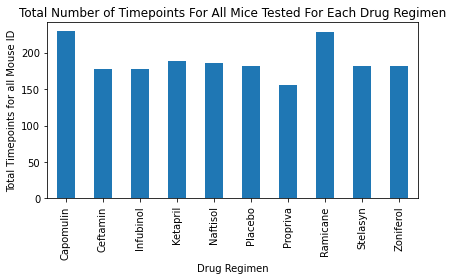

In [79]:
mouse_unique.groupby(["Drug Regimen"])["Mouse ID" and "Timepoint"].count().plot(kind='bar',
                                                                              ylabel='Total Timepoints for all Mouse ID',
                                                                             title='Total Number of Timepoints For All Mice Tested For Each Drug Regimen')
plt.tight_layout()
#plt.savefig("plots/DataFrame Bar Chart - Total Timepoints For All Mice Tested For Each Drug Regimen.pdf")
# MATCHES CALCULATIONS PER Drug Regimen!!
# USES .plot(kind='bar',...)

In [80]:
# NOT CORRECT!  # PLUS "Mouse ID", "Timepoint" returns deprecation message
# mouse_unique.groupby(["Drug Regimen"])["Mouse ID", "Timepoint"].count().plot(kind='bar', ylabel="Timepoint")

In [81]:
# NOT CORRECT!  # PLUS "Mouse ID" or "Timepoint" does not return deprecation message
# mouse_unique.groupby(["Drug Regimen"])["Mouse ID" or "Timepoint"].count().plot(kind='bar', ylabel="Mouse ID")

In [82]:
# NOT CORRECT! 
# mouse_unique.groupby(["Drug Regimen"])["Mouse ID"].count().plot(kind='bar')

In [83]:
# NOT CORRECT! 
# mouse_unique.groupby(["Drug Regimen"])["Timepoint"].sum().plot(kind='bar')

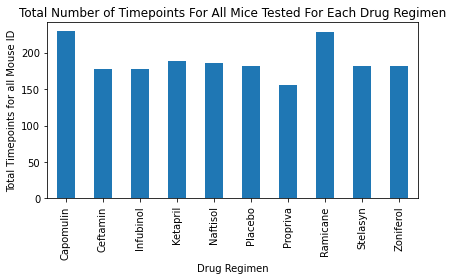

In [84]:
mouse_unique.groupby(["Drug Regimen"])["Mouse ID" and
                                       "Timepoint"].count().plot.bar("Drug Regimen",
                                                                   ylabel="Total Timepoints for all Mouse ID",
                                                                  title='Total Number of Timepoints For All Mice Tested For Each Drug Regimen')
plt.tight_layout()
#plt.savefig("plots/DataFrame Bar Chart2 - Total Timepoints For All Mice Tested For Each Drug Regimen",transparent=True)
#plt.savefig("plots/DataFrame Bar Chart2 - Total Timepoints For All Mice Tested For Each Drug Regimen.pdf")


In [85]:
# NOT CORRECT! # Shows y scale based on Timepoint 0 - 45
# mouse_unique[["Timepoint", "Drug Regimen", "Mouse ID"]].plot.bar("Drug Regimen", "Timepoint")

In [86]:
# NOT CORRECT! # Shows y scale based on Timepoint 0 - 45
# mouse_unique[["Timepoint","Mouse ID", "Drug Regimen"]].plot(kind='bar', x='Drug Regimen', y='Timepoint')

In [87]:
# NOT CORRECT! # Shows y scale based on Timepoint 0 - 45
# mouse_unique.plot(kind='bar', x='Drug Regimen', y='Timepoint', figsize=(10,8))

## Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

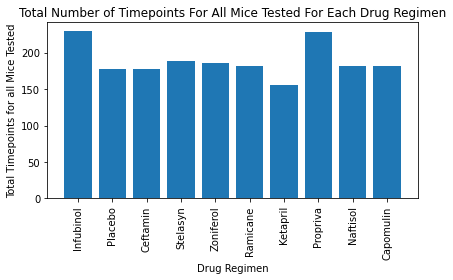

In [88]:


drug_names = mouse_unique["Drug Regimen"].unique()
# print(drugs)
x_axis = np.arange(len(drug_names))
# x_axis

y_axis = np.arange(len(dmt_sum))
# y_axis

plt.title("Total Number of Timepoints For All Mice Tested For Each Drug Regimen")
plt.ylabel("Total Timepoints for all Mice Tested")
plt.xlabel("Drug Regimen")
plt.xticks(rotation='vertical')
plt.bar(drug_names, dmt_sum, align="center")

plt.tight_layout()
#plt.savefig("plots/pyplot Bar Chart - Total Timepoints For All Mice Tested For Each Drug Regimen.pdf")




## Generate a pie plot showing the distribution of female versus male mice using Pandas

In [89]:
mouse_unique.value_counts()

Mouse ID  Drug Regimen  Sex     Age_months  Weight (g)  Timepoint  Metastatic Sites  Tumor Volume (mm3)
a203      Infubinol     Female  20          23          0          0                 45.000000             1
q597      Ramicane      Male    20          25          40         2                 44.471821             1
q633      Zoniferol     Male    12          25          10         0                 49.001866             1
                                                        5          0                 47.183802             1
                                                        0          0                 45.000000             1
                                                                                                          ..
i334      Ramicane      Female  8           20          5          0                 41.020518             1
                                                        0          0                 45.000000             1
i177      Ramicane      

In [90]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#mouse_sex = mouse_unique.groupby(["Sex"])["Drug Regimen"].value_counts()
mouse_sex_per_drug_count = mouse_unique.groupby(["Sex","Drug Regimen"])["Sex" and "Drug Regimen"].count()
#mouse_sex.value_counts()
#mouse_sex.count()

mouse_sex_per_drug_count.head()
#total_mouse = mouse_unique["Sex"]
#total_mouse.count()
#total_mouse.dtype
#type(total_mouse)
#type(mouse_sex)#series
#mouse_sex.dtype#int64

Sex     Drug Regimen
Female  Capomulin       128
        Ceftamin         92
        Infubinol        95
        Ketapril         58
        Naftisol         86
Name: Drug Regimen, dtype: int64

In [91]:
# mouse_sex_per_drug_count = mouse_unique.groupby(["Sex","Drug Regimen"])["Sex" and "Drug Regimen"].count()

In [92]:
#sex_drugs = mouse_unique[["Sex", "Drug Regimen"]].value_counts()
#sex_drugs = mouse_unique.groupby(["Sex", "Drug Regimen"])["Mouse ID"].count()
sex_drugs = mouse_unique.groupby(["Sex"])["Sex" and "Drug Regimen"].count()
#sex_drugs.value_counts()
sex_drugs
#type(sex_drugs)#series
#sex_drugs.dtype#int64

Sex
Female    930
Male      958
Name: Drug Regimen, dtype: int64

In [93]:
def func(pct):
    return "{:1.1f}%".format(pct)

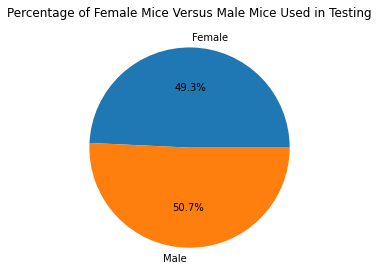

In [94]:
sex_drugs.plot.pie(title='Percentage of Female Mice Versus Male Mice Used in Testing', ylabel='',
                                 y="Percent Female", labels=["Female","Male"],
                                 autopct=lambda pct: func(pct))

plt.tight_layout()
#plt.savefig("plots/DataFrame Pie Chart - Percentage Female Mice Versus Male Mice used in Testing.pdf")



## I wanted to see what percentage of females were used for each drug regimen.

In [95]:
female = mouse_unique.loc[mouse_unique["Sex"] == "Female", ["Sex","Drug Regimen"]].value_counts()
#female.value_counts()
female
# female_group = female.groupby(["Drug Regimen"])
# female_group.head()
#type(female)#series
#female.dtype#int64

Sex     Drug Regimen
Female  Capomulin       128
        Zoniferol       119
        Stelasyn        107
        Placebo         102
        Infubinol        95
        Ceftamin         92
        Naftisol         86
        Ramicane         74
        Propriva         69
        Ketapril         58
dtype: int64

In [96]:
male = mouse_unique.loc[mouse_unique["Sex"] == "Male", ["Sex","Drug Regimen"]].value_counts()
male

Sex   Drug Regimen
Male  Ramicane        154
      Ketapril        130
      Capomulin       102
      Naftisol        100
      Propriva         87
      Ceftamin         86
      Infubinol        83
      Placebo          79
      Stelasyn         74
      Zoniferol        63
dtype: int64

In [97]:
tsex = mouse_unique.groupby(["Drug Regimen"], as_index=False)["Sex"].count()
tsex
#total_sex = female + male
#total_sex

,Drug Regimen,Sex
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,156
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


In [187]:
tsexc = mouse_unique.groupby(["Drug Regimen"], as_index=False)[["Drug Regimen" , "Sex"]].count()
tsexc

,Drug Regimen,Sex
0,230,230
1,178,178
2,178,178
3,188,188
4,186,186
5,181,181
6,156,156
7,228,228
8,181,181
9,182,182


In [188]:
totalsex_count = (mouse_unique.groupby(["Drug Regimen","Sex"])[["Sex"]])
totalsex_count.count()
#totalsex_count.value_counts()

Sex
Drug Regimen Sex        
Capomulin    Female  128
             Male    102
Ceftamin     Female   92
             Male     86
Infubinol    Female   95
             Male     83
Ketapril     Female   58
             Male    130
Naftisol     Female   86
             Male    100
Placebo      Female  102
             Male     79
Propriva     Female   69
             Male     87
Ramicane     Female   74
             Male    154
Stelasyn     Female  107
             Male     74
Zoniferol    Female  119
             Male     63

In [100]:
#percent_female = round(((female / tsex) * 100), 2)#worked when did not have as_index=True
#percent_female

In [101]:
#percent_male = round(((male / tsex) * 100), 2)#worked when did not have as_index=True
#percent_male

In [102]:
fmouse = mouse_unique.loc[(mouse_unique["Sex"] == "Female"), :]
fmouse.value_counts()

Mouse ID  Drug Regimen  Sex     Age_months  Weight (g)  Timepoint  Metastatic Sites  Tumor Volume (mm3)
a203      Infubinol     Female  20          23          0          0                 45.000000             1
r554      Capomulin     Female  8           17          0          0                 45.000000             1
q610      Ramicane      Female  18          21          15         0                 45.889028             1
                                                        20         0                 46.585433             1
                                                        25         0                 40.146450             1
                                                                                                          ..
i386      Infubinol     Female  23          29          20         2                 55.087724             1
                                                        25         3                 56.687864             1
                        

In [103]:
fmouse_group = fmouse.groupby(["Drug Regimen"], as_index=False)["Sex"].count()
fmouse_group.head()

,Drug Regimen,Sex
0,Capomulin,128
1,Ceftamin,92
2,Infubinol,95
3,Ketapril,58
4,Naftisol,86


In [104]:
mmouse = mouse_unique.loc[(mouse_unique["Sex"] == "Male"), :]
mmouse.head()
#mmouse.dtypes
#type(mmouse)#DataFrame

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Metastatic Sites,Tumor Volume (mm3)
57,a411,Ramicane,Male,3,22,0,0,45.000000
58,a411,Ramicane,Male,3,22,5,0,45.466677
59,a411,Ramicane,Male,3,22,10,1,40.759788
60,a411,Ramicane,Male,3,22,15,1,41.484169
61,a411,Ramicane,Male,3,22,20,1,38.087373


In [105]:
mmm = mmouse[["Drug Regimen", "Sex"]]
mmm.head()

,Drug Regimen,Sex
57,Ramicane,Male
58,Ramicane,Male
59,Ramicane,Male
60,Ramicane,Male
61,Ramicane,Male


In [106]:
mmouse_group = mmouse.groupby(["Drug Regimen"], as_index=False)["Sex"].count()
mmouse_group.head()
#type(mmouse_group)#DataFrame

,Drug Regimen,Sex
0,Capomulin,102
1,Ceftamin,86
2,Infubinol,83
3,Ketapril,130
4,Naftisol,100


In [107]:
fmouse_percent = round(((fmouse_group["Sex"] / tsex["Sex"]) * 100), 2)
#type(fmouse_percent)
fmouse_percent.head()

0    55.65
1    51.69
2    53.37
3    30.85
4    46.24
Name: Sex, dtype: float64

In [108]:
fm_df = fmouse_percent.to_frame()
fm_df



,Sex
0,55.65
1,51.69
2,53.37
3,30.85
4,46.24
5,56.35
6,44.23
7,32.46
8,59.12
9,65.38


In [109]:
mmouse_percent = round(((mmouse_group["Sex"] / tsex["Sex"]) * 100), 2)
mmouse_percent


0    44.35
1    48.31
2    46.63
3    69.15
4    53.76
5    43.65
6    55.77
7    67.54
8    40.88
9    34.62
Name: Sex, dtype: float64

In [110]:
mm_df = mmouse_percent.to_frame()
mm_df

,Sex
0,44.35
1,48.31
2,46.63
3,69.15
4,53.76
5,43.65
6,55.77
7,67.54
8,40.88
9,34.62


In [111]:
#summary_sex = [{"Percent Female":fmouse_percent,
#               "Percent Male":mmouse_percent}]
#               "Total":tsex}]
#summary_sex
summary_percent = pd.DataFrame({"Percent Female": fmouse_percent, "Percent Male": mmouse_percent})
summary_percent.value_counts()
#summary_percent.sum()

Percent Female  Percent Male
30.85           69.15           1
32.46           67.54           1
44.23           55.77           1
46.24           53.76           1
51.69           48.31           1
53.37           46.63           1
55.65           44.35           1
56.35           43.65           1
59.12           40.88           1
65.38           34.62           1
dtype: int64

In [112]:
tsex

,Drug Regimen,Sex
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,156
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


In [113]:
drug_sex_percent_df = tsex.merge(summary_percent, left_index=True, right_index=True)

drug_sex_percent_df

,Drug Regimen,Sex,Percent Female,Percent Male
0,Capomulin,230,55.65,44.35
1,Ceftamin,178,51.69,48.31
2,Infubinol,178,53.37,46.63
3,Ketapril,188,30.85,69.15
4,Naftisol,186,46.24,53.76
5,Placebo,181,56.35,43.65
6,Propriva,156,44.23,55.77
7,Ramicane,228,32.46,67.54
8,Stelasyn,181,59.12,40.88
9,Zoniferol,182,65.38,34.62


In [114]:
drug_sex_percent_df.set_index("Drug Regimen")

,Sex,Percent Female,Percent Male
Drug Regimen,,,
Capomulin,230,55.65,44.35
Ceftamin,178,51.69,48.31
Infubinol,178,53.37,46.63
Ketapril,188,30.85,69.15
Naftisol,186,46.24,53.76
Placebo,181,56.35,43.65
Propriva,156,44.23,55.77
Ramicane,228,32.46,67.54
Stelasyn,181,59.12,40.88


In [115]:
drug_sex_percent_female = drug_sex_percent_df[["Drug Regimen", "Percent Female"]]
drug_sex_percent_female

,Drug Regimen,Percent Female
0,Capomulin,55.65
1,Ceftamin,51.69
2,Infubinol,53.37
3,Ketapril,30.85
4,Naftisol,46.24
5,Placebo,56.35
6,Propriva,44.23
7,Ramicane,32.46
8,Stelasyn,59.12
9,Zoniferol,65.38


In [116]:
sex_drug_percent_female = drug_sex_percent_df[["Percent Female", "Drug Regimen"]]
sex_drug_percent_female

,Percent Female,Drug Regimen
0,55.65,Capomulin
1,51.69,Ceftamin
2,53.37,Infubinol
3,30.85,Ketapril
4,46.24,Naftisol
5,56.35,Placebo
6,44.23,Propriva
7,32.46,Ramicane
8,59.12,Stelasyn
9,65.38,Zoniferol


In [117]:
sex_f = sex_drug_percent_female["Percent Female"].value_counts().index
sex_f
#test_sex


Float64Index([55.65, 51.69, 53.37, 30.85, 46.24, 56.35, 44.23, 32.46, 59.12,
              65.38],
             dtype='float64')

In [118]:
drug_f = sex_drug_percent_female["Drug Regimen"].value_counts().index
drug_f

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object')

In [119]:
#drug_sex_percent_female.set_index("Drug Regimen")
drug_sex_percent_female.reset_index()

,index,Drug Regimen,Percent Female
0,0,Capomulin,55.65
1,1,Ceftamin,51.69
2,2,Infubinol,53.37
3,3,Ketapril,30.85
4,4,Naftisol,46.24
5,5,Placebo,56.35
6,6,Propriva,44.23
7,7,Ramicane,32.46
8,8,Stelasyn,59.12
9,9,Zoniferol,65.38


In [120]:
drug_sex_percent_female["Percent Female"]

0    55.65
1    51.69
2    53.37
3    30.85
4    46.24
5    56.35
6    44.23
7    32.46
8    59.12
9    65.38
Name: Percent Female, dtype: float64

In [121]:
#female_percent = round(((female / tsex) * 100), 2)#worked when did not have as_index=True
#female_percent
#type(female_percent)
#f_per = female_percent.unique()
#f_per

In [122]:
#male_percent = round(((male / tsex) * 100), 2)#worked when did not have as_index=True
#male_percent
#m_per = male_percent.unique()
#m_per

In [123]:
#drugs = drug_sex_percent_female["Drug Regimen"].unique()
#type(drugs)

In [124]:
drugs = drug_sex_percent_female["Drug Regimen"].unique()
drugs

array(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
       'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype=object)

In [125]:
drugs_test = drug_sex_percent_female.iloc[:,0]
#type(drugs_test)#Series
drugs_test

0    Capomulin
1     Ceftamin
2    Infubinol
3     Ketapril
4     Naftisol
5      Placebo
6     Propriva
7     Ramicane
8     Stelasyn
9    Zoniferol
Name: Drug Regimen, dtype: object

In [126]:
drug_sex_percent_female["Drug Regimen"]

0    Capomulin
1     Ceftamin
2    Infubinol
3     Ketapril
4     Naftisol
5      Placebo
6     Propriva
7     Ramicane
8     Stelasyn
9    Zoniferol
Name: Drug Regimen, dtype: object

In [127]:
label = drug_sex_percent_female["Percent Female"].unique()
type(label)
label


array([55.65, 51.69, 53.37, 30.85, 46.24, 56.35, 44.23, 32.46, 59.12,
       65.38])

In [128]:
drug_sex_percent_female.dtypes

Drug Regimen       object
Percent Female    float64
dtype: object

In [129]:
#drug_sex_percent_female["Percent Female"].astype(object)

In [130]:
#label = drug_sex_percent_female["Percent Female"].unique().astype(object)
#label.dtype
#label

In [131]:
label1 = drug_sex_percent_female["Percent Female"].value_counts()
#type(label)#Series
lab = label1.index
#label
#type(lab)
#type(label)#Series
label1

55.65    1
51.69    1
53.37    1
30.85    1
46.24    1
56.35    1
44.23    1
32.46    1
59.12    1
65.38    1
Name: Percent Female, dtype: int64

In [132]:
label_test = drug_sex_percent_female.iloc[:,1].value_counts()
#type(label_test)#Series
label_test

55.65    1
51.69    1
53.37    1
30.85    1
46.24    1
56.35    1
44.23    1
32.46    1
59.12    1
65.38    1
Name: Percent Female, dtype: int64

In [133]:
#drug_sex_percent_female.astype(object)

In [134]:
#drug_sex_percent_female.dtypes

In [135]:
#def func(pct):
#    return "{:1.1f}%".format(pct)

In [136]:
#def func(pct1, allvals):
#    return "{:.1f}%\n({:d} g)".format(pct1, allvals)

### Keep getting percent female as labels with autopercent for size of each wedge corresponding to drug.

### Want percent female as labels but text inside each wedge to be drug name.

<AxesSubplot:title={'center':'Percentage of Female Mice Used For Each Drug Regimen'}>

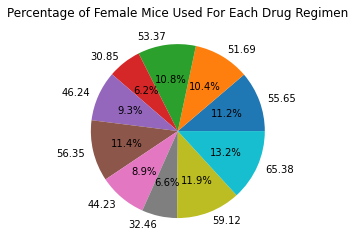

In [137]:
drug_sex_percent_df.plot.pie(title='Percentage of Female Mice Used For Each Drug Regimen', ylabel='',
                                 y="Percent Female", labels=drug_sex_percent_female["Percent Female"],
                                 autopct=lambda pct: func(pct),
                                 legend=None)


<AxesSubplot:title={'center':'Percentage of Female Mice Used For Each Drug Regimen'}>

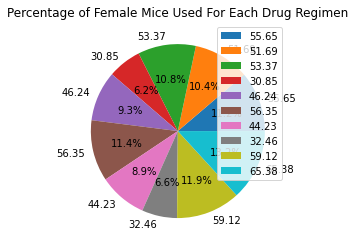

In [138]:
drug_sex_percent_female.plot.pie(title='Percentage of Female Mice Used For Each Drug Regimen', ylabel='',
                                 y="Percent Female", labels=drug_sex_percent_female["Percent Female"],
                                 autopct=lambda pct: func(pct),
                                 legend="Drug Regimen")

<AxesSubplot:title={'center':'Percentage of Female Mice Used For Each Drug Regimen'}>

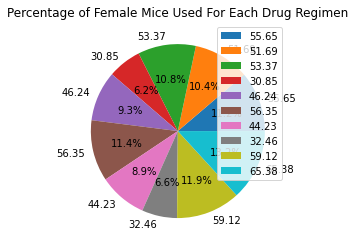

In [139]:
drug_sex_percent_female.plot.pie(title='Percentage of Female Mice Used For Each Drug Regimen', ylabel='',
                                 y="Percent Female", labels=drug_sex_percent_female["Percent Female"],
                                 autopct=lambda pct: func(pct),
                                 legend="Drug Regimen")

<AxesSubplot:title={'center':'Percentage of Female Mice Used For Each Drug Regimen'}>

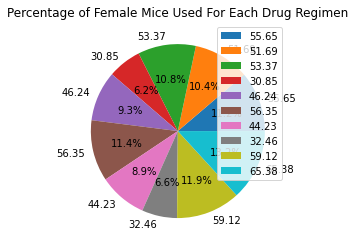

In [140]:
drug_sex_percent_df.plot.pie(title='Percentage of Female Mice Used For Each Drug Regimen', ylabel='',
                                 y="Percent Female", labels=drug_sex_percent_df["Percent Female"],
                                 autopct=lambda pct: func(pct),
                                 legend="Drug Regimen")

<AxesSubplot:title={'center':'Just Percent Female Mice Shown'}, ylabel='Percent Female'>

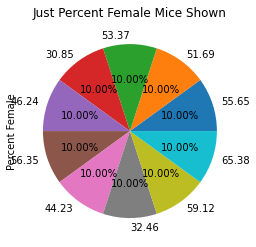

In [141]:
label_test.plot.pie(label="Percent Female", title="Just Percent Female Mice Shown", autopct='%2.2f%%')

array([<AxesSubplot:ylabel='Sex'>], dtype=object)

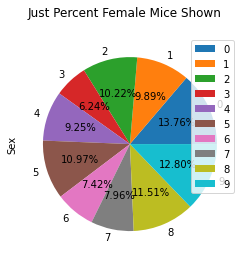

In [142]:
fmouse_group.plot.pie(y="Sex", title="Just Percent Female Mice Shown", autopct='%2.2f%%', subplots=True)

### Really want the following with drug names as labels, but want percentage female to be within wedges.

<AxesSubplot:title={'center':'Percentage of Female Mice Used For Each Drug Regimen'}>

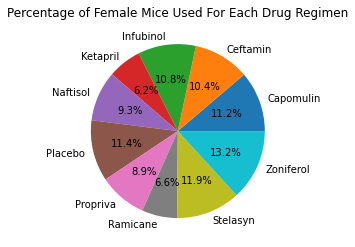

In [143]:
drug_sex_percent_female.plot.pie(y="Percent Female", labels=drug_sex_percent_female["Drug Regimen"],
                                 title='Percentage of Female Mice Used For Each Drug Regimen',
                                 ylabel='',
                                 autopct=lambda pct: func(pct),
                                 legend=None)

<AxesSubplot:title={'center':'Percentage of Female Mice Used For Each Drug Regimen'}>

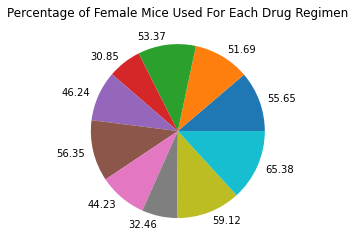

In [144]:
sex_drug_percent_female.plot.pie(y="Percent Female", labels=sex_f,
                                 title='Percentage of Female Mice Used For Each Drug Regimen',
                                 ylabel='',
                                 autopct=None,
                                 legend=None)

array([<AxesSubplot:>], dtype=object)

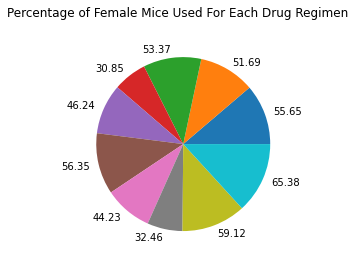

In [145]:
sex_drug_percent_female.plot.pie(x=drug_f, subplots=True, y="Percent Female", labels=sex_f,
                                 title='Percentage of Female Mice Used For Each Drug Regimen',
                                 ylabel='',
                                 autopct=None,
                                 legend=None)

<AxesSubplot:title={'center':'Percentage of Female Mice Used For Each Drug Regimen'}>

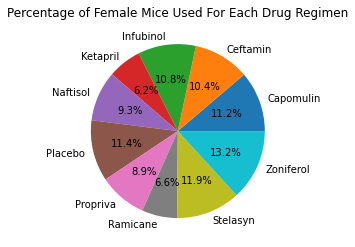

In [146]:
drug_sex_percent_female.plot.pie(y="Percent Female", labels=drugs,
                                 title='Percentage of Female Mice Used For Each Drug Regimen',
                                 ylabel='',
                                 autopct=lambda pct: func(pct),
                                 legend=None)

In [147]:
label

type(label)
#print(label)

numpy.ndarray

In [148]:
drugs

type(drugs)


numpy.ndarray

### Finally did this exploded pie which helps tell the story better.

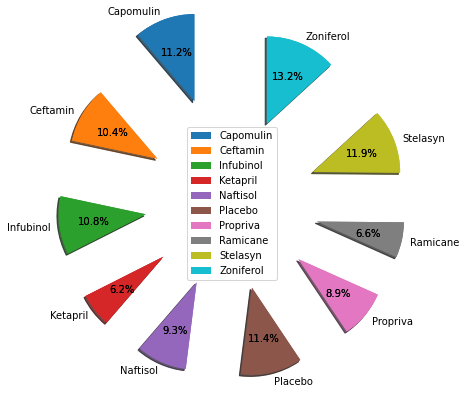

In [149]:
fig1, ax1 = plt.subplots()
explode = (1.25,1,1,1,1,1,1,1,1,1)
sizes = label
labels = drugs_test

ax1.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%', shadow=True, startangle=90)

patches, texts, auto = ax1.pie(sizes, shadow=True, startangle=90,explode=explode, autopct='%1.1f%%' )

plt.legend(patches, labels, loc="best")
plt.show()



### This is the best I could get without doing a nested pie chart (a donut).
### Each wedge shows a drug regimen with its percentage of overall testing.
### The legend color matches the drug regimen and shows the percentage female mice used in testing of each drug.

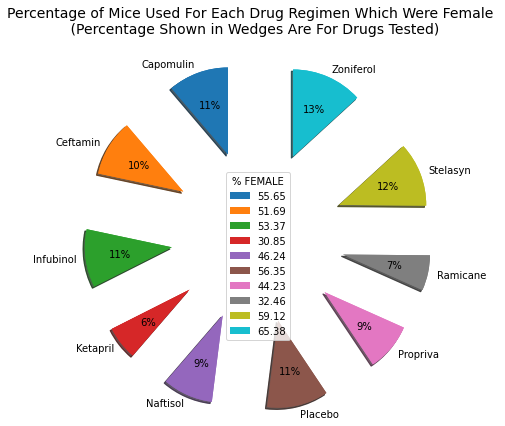

In [150]:
fig1, ax1 = plt.subplots()
explode = (1,1,1,1,1,1,1,1,1,1)
sizes = label
labels = label

ax1.pie(sizes, explode=explode, labels=drugs_test, shadow=True, startangle=90)
patches, texts, auto= ax1.pie(sizes, shadow=True, startangle=90, autopct='%0.0f%%', explode=explode)

plt.legend(patches, labels, loc="best", title="% FEMALE")

#ax1.set_title("Percentage of Female Mice Used For Each Drug Regimen")

fig1.suptitle("Percentage of Mice Used For Each Drug Regimen Which Were Female \n (Percentage Shown in Wedges Are For Drugs Tested)", y=1.30, fontsize=14)

#plt.tight_layout()#doesn't work well with exploded pie
#fig1 = plt.figure(figsize=(5,7))#doesn't work
#fig1.set_figheight(5)
#fig1.set_figwidth(6)
#plt.savefig("plots/pyplot exploded Pie Chart - Percentage Female Mice Used For Each Drug Regimen Testing.pdf")


plt.show()

## Generate a pie plot showing the distribution of female versus male mice using pyplot


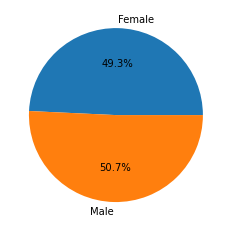

In [151]:

data_set = sex_drugs
#y="Percent Female"
my_labels = ["Female","Male"]
plt.pie(data_set, labels = my_labels, autopct=lambda pct: func(pct))
plt.show()

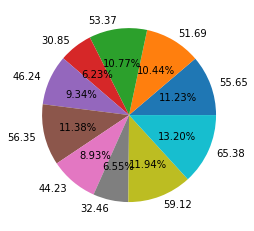

In [152]:
from matplotlib.pyplot import pie, show
from numpy import array
frac = label
data_set = label
my_labels = label
pie(data_set, labels = my_labels, autopct='%2.2f%%')
show()

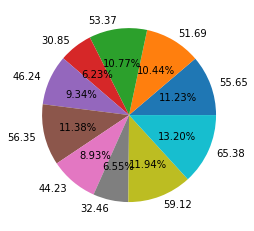

In [153]:
data_set = label
my_labels = label
plt.pie(data_set, labels = my_labels, autopct='%2.2f%%')
plt.show()

<AxesSubplot:title={'center':'Percentage of Female Mice Used For Each Drug Regimen'}>

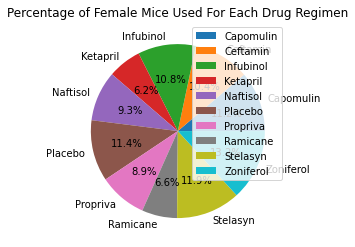

In [154]:
drug_sex_percent_female.plot.pie(y="Percent Female", labels=drug_sex_percent_female["Drug Regimen"],
                                 title='Percentage of Female Mice Used For Each Drug Regimen',
                                 ylabel='',
                                 autopct=lambda pct: func(pct),
                                 legend="Drug Regimen")

## Quartiles, Outliers and Boxplots

#### Calculate the final tumor volume of each mouse across four of the treatment regimens:
#### Capomulin, Ramicane, Infubinol, and Ceftamin

In [155]:
mouse_unique.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Metastatic Sites,Tumor Volume (mm3)
0,a203,Infubinol,Female,20,23,0,0,45.000000
1,a203,Infubinol,Female,20,23,5,0,48.508468
2,a203,Infubinol,Female,20,23,10,1,51.852437
3,a203,Infubinol,Female,20,23,15,1,52.777870
4,a203,Infubinol,Female,20,23,20,1,55.173336


In [156]:
final_tumor = mouse_unique.groupby(["Tumor Volume (mm3)", "Mouse ID", "Drug Regimen"], as_index=False)["Tumor Volume (mm3)"].max()
final_tumor

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,k403,Ramicane,22.050126
1,s185,Capomulin,23.343598
2,k403,Ramicane,24.365505
3,s185,Capomulin,25.472143
4,k403,Ramicane,26.546993
...,...,...,...
1883,t724,Naftisol,75.113288
1884,m269,Stelasyn,75.123690
1885,p189,Ketapril,75.294936
1886,l725,Naftisol,76.668817


#### Start by getting the last (greatest) timepoint for each mouse
#### df final_time gives greatest timepoint and largest volume for each mouse

In [189]:
final_time = mouse_unique.groupby(["Mouse ID", "Drug Regimen"], as_index=False)[["Timepoint", "Tumor Volume (mm3)"]].max()
final_time
#KEY!!!!  DOUBLE SQUARE BRACKETS CLEARS "USE LIST INSTEAD" ERROR!!!
display(final_time)

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,a203,Infubinol,45,67.973419
1,a251,Infubinol,45,65.525743
2,a262,Placebo,45,70.717621
3,a275,Ceftamin,45,62.999356
4,a366,Stelasyn,30,63.440686
...,...,...,...,...
244,z435,Propriva,10,48.710661
245,z578,Ramicane,45,45.000000
246,z581,Infubinol,45,62.754451
247,z795,Naftisol,45,65.741070


In [190]:
pd.set_option('display.max_rows', None)

In [193]:
final_time2 = mouse_unique.groupby(["Tumor Volume (mm3)", "Timepoint"],
                                   as_index=False).max().sort_values(ascending=False, by=["Tumor Volume (mm3)"])
final_time2["Drug Regimen"].unique()
#KEY!!!!  DOUBLE SQUARE BRACKETS CLEARS "USE LIST INSTEAD" ERROR!!!

array(['Ketapril', 'Naftisol', 'Stelasyn', 'Zoniferol', 'Placebo',
       'Propriva', 'Infubinol', 'Ceftamin', 'Capomulin', 'Ramicane'],
      dtype=object)

In [159]:
final_time["Drug Regimen"].value_counts()

Infubinol    25
Placebo      25
Ceftamin     25
Zoniferol    25
Ramicane     25
Ketapril     25
Propriva     25
Naftisol     25
Capomulin    25
Stelasyn     24
Name: Drug Regimen, dtype: int64

In [160]:
# test output of Timepoint
mouse_unique.loc[mouse_unique["Mouse ID"]=="a203"]
# test checks out!

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Metastatic Sites,Tumor Volume (mm3)
0,a203,Infubinol,Female,20,23,0,0,45.000000
1,a203,Infubinol,Female,20,23,5,0,48.508468
2,a203,Infubinol,Female,20,23,10,1,51.852437
3,a203,Infubinol,Female,20,23,15,1,52.777870
4,a203,Infubinol,Female,20,23,20,1,55.173336
5,a203,Infubinol,Female,20,23,25,1,56.793208
6,a203,Infubinol,Female,20,23,30,1,59.523197
7,a203,Infubinol,Female,20,23,35,2,61.931650
8,a203,Infubinol,Female,20,23,40,2,63.593490
9,a203,Infubinol,Female,20,23,45,2,67.973419


In [161]:
# test output#2 of Timepoint
mouse_unique.loc[mouse_unique["Mouse ID"]=="z969"]
# test checks out!

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Metastatic Sites,Tumor Volume (mm3)
1879,z969,Naftisol,Male,9,30,0,0,45.000000
1880,z969,Naftisol,Male,9,30,5,0,49.332999
1881,z969,Naftisol,Male,9,30,10,1,52.656081
1882,z969,Naftisol,Male,9,30,15,2,54.713005
1883,z969,Naftisol,Male,9,30,20,2,57.898778
1884,z969,Naftisol,Male,9,30,25,2,63.145652
1885,z969,Naftisol,Male,9,30,30,3,65.841013
1886,z969,Naftisol,Male,9,30,35,4,69.176246
1887,z969,Naftisol,Male,9,30,40,4,70.314904
1888,z969,Naftisol,Male,9,30,45,4,73.867845


In [162]:
# test output#3 of Timepoint - WITH MOUSE ID = g989 with mouse_study when it had duplicates
mouse_study.loc[mouse_study["Mouse ID"]=="g989"]
# test checks out!  DUPLICATES SHOWING FOR Timepoints 0, 5, 10, 15, 20! #mouse_study has 1893 rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [163]:
# test output#3 of Timepoint - WITH MOUSE ID = g989 WHICH HAD DUPLICATES
mouse_unique.loc[mouse_unique["Mouse ID"]=="g989"]
# test checks out!  DUPLICATES STILL GONE!  #mouse_unique has 1888 rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Metastatic Sites,Tumor Volume (mm3)
586,g989,Propriva,Female,21,26,0,0,45.000000
587,g989,Propriva,Female,21,26,5,0,48.786801
588,g989,Propriva,Female,21,26,10,0,51.745156
589,g989,Propriva,Female,21,26,15,0,53.442020
591,g989,Propriva,Female,21,26,20,1,55.326122
592,g989,Propriva,Female,21,26,25,1,56.045564
593,g989,Propriva,Female,21,26,30,1,59.082294
594,g989,Propriva,Female,21,26,35,2,62.570880


#### Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#### df specific_treatments gives last timepoint at largest volume for all mice used in specific drug regimen

In [164]:
#.groupby(["Tumor Volume (mm3)","Timepoint"],as_index=False).max().sort_values(ascending=False,by=["Tumor Volume (mm3)"])


In [194]:
specific_treatments = final_time.loc[(lambda final_time: (final_time["Drug Regimen"] == "Capomulin") |
                                      (final_time["Drug Regimen"] == "Ramicane") |
                                      (final_time["Drug Regimen"] == "Infubinol") |
                                      (final_time["Drug Regimen"] == "Ceftamin")), :]
specific_treatments

# idea from https://stackoverflow.com/questions/61250615/how-do-you-use-loc-in-pandas-with-more-than-one-condition


,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,a203,Infubinol,45,67.973419
1,a251,Infubinol,45,65.525743
3,a275,Ceftamin,45,62.999356
6,a411,Ramicane,45,45.466677
7,a444,Ramicane,45,45.000000
10,a520,Ramicane,45,45.000000
11,a577,Infubinol,30,57.031862
12,a644,Ramicane,45,46.910892
13,a685,Infubinol,45,66.083066
19,b128,Capomulin,45,45.651331


In [166]:
specific_treatments2 = final_time2.loc[(lambda final_time2: (final_time2["Drug Regimen"] == "Capomulin") |
                                      (final_time2["Drug Regimen"] == "Ramicane") |
                                      (final_time2["Drug Regimen"] == "Infubinol") |
                                      (final_time2["Drug Regimen"] == "Ceftamin")), :].groupby(["Tumor Volume (mm3)","Timepoint"],
                                                                                               as_index=False).max().sort_values(ascending=False,by=["Tumor Volume (mm3)"])
specific_treatments2

# idea from https://stackoverflow.com/questions/61250615/how-do-you-use-loc-in-pandas-with-more-than-one-condition



,Tumor Volume (mm3),Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Metastatic Sites
713,72.226731,45,c139,Infubinol,Male,11,28,2
712,69.428141,40,c139,Infubinol,Male,11,28,2
711,68.923185,45,k210,Ceftamin,Male,15,28,3
710,68.594745,45,y769,Ceftamin,Female,6,27,4
709,67.973419,45,a203,Infubinol,Female,20,23,2
...,...,...,...,...,...,...,...,...
4,26.546993,35,k403,Ramicane,Male,21,16,1
3,25.472143,40,s185,Capomulin,Female,3,17,1
2,24.365505,40,k403,Ramicane,Male,21,16,1
1,23.343598,45,s185,Capomulin,Female,3,17,1


In [167]:
#specific_treatments["Drug Regimen"].value_counts()#25 for each of the 4 drug regimens
#specific_treatments["Drug Regimen"].unique()# 4 drug regimens

Infubinol    25
Ceftamin     25
Ramicane     25
Capomulin    25
Name: Drug Regimen, dtype: int64

In [196]:
specific_treatments["Mouse ID"].unique()# 100 mice

array(['a203', 'a251', 'a275', 'a411', 'a444', 'a520', 'a577', 'a644',
       'a685', 'b128', 'b447', 'b487', 'b742', 'b759', 'c139', 'c326',
       'c458', 'c758', 'c895', 'd251', 'e476', 'e662', 'f345', 'f436',
       'f966', 'g288', 'g316', 'g791', 'h531', 'i177', 'i334', 'i386',
       'i557', 'i738', 'j119', 'j246', 'j296', 'j913', 'j989', 'k210',
       'k403', 'k483', 'k804', 'l471', 'l490', 'l509', 'l558', 'l661',
       'l733', 'l897', 'm546', 'm601', 'm756', 'm957', 'n364', 'n671',
       'o287', 'o809', 'o813', 'p438', 'q132', 'q483', 'q597', 'q610',
       'r157', 'r554', 'r811', 'r921', 'r944', 's121', 's185', 's508',
       's710', 't565', 't573', 'u149', 'u153', 'u196', 'u364', 'v339',
       'v719', 'v766', 'v923', 'w150', 'w151', 'w193', 'w584', 'w678',
       'w914', 'x226', 'x401', 'x581', 'x822', 'y163', 'y449', 'y769',
       'y793', 'y865', 'z578', 'z581'], dtype=object)

In [168]:
spec_treat_time = specific_treatments["Timepoint"].value_counts()
spec_treat_time

45    63
30     9
5      6
0      4
15     4
35     4
25     3
20     3
40     2
10     2
Name: Timepoint, dtype: int64

In [197]:
specific_treatments4.loc[specific_treatments4["Drug Regimen"] == "Ramicane"].sort_values(ascending=False,
                                                                                      by=["Tumor Volume (mm3)"])

NameError: name 'specific_treatments4' is not defined

In [170]:
#mouse_unique.head()

In [171]:
#mouse_specific = pd.merge(specific_treatments, mouse_unique, how="left", on=["Mouse ID", "Drug Regimen",
#                                                                             "Timepoint", "Tumor Volume (mm3)" ])
#mouse_specific
# Will not work.  Get proper number of rows=100 but many NaN

In [172]:
# test output#1 to check NaN values
#mouse_unique.loc[mouse_unique["Mouse ID"]=="a411"]
# there were no NaN so the how="left" did not work; although, there were the proper number of rows

In [173]:
#mouse_unique.dtypes
#To confirm dtypes are not causing any issues

In [174]:
#mouse_rearranged = mouse_unique[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)",
#                                "Sex", "Age_months", "Weight (g)", "Metastatic Sites"]]
#mouse_rearranged
#Did not help be rearranging columns.  Still get NaN.

In [175]:
#specific_treatments.dtypes

In [176]:
#mouse_specific = pd.merge(specific_treatments, mouse_rearranged, how="left", on=["Mouse ID",
#                                                                      "Drug Regimen","Timepoint",
#                                                                      "Tumor Volume (mm3)"])
#mouse_specific
#Will not work! Get 100 rows but still get many NaN.

In [177]:
# this merge is just to show only half as many columns, but no NaN when let merge happen automatically
# it is the same as how="inner", on=["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]
# get only 50 rows
#mouse_specific = pd.merge(specific_treatments, mouse_unique)
#mouse_specific

In [178]:
#mouse_specific.info()
#specific_treatments.info()
#mouse_unique.info()

In [179]:
mouse_treatments = mouse_unique.loc[(lambda mouse_unique: (mouse_unique["Drug Regimen"] == "Capomulin") |
                                      (mouse_unique["Drug Regimen"] == "Ramicane") |
                                      (mouse_unique["Drug Regimen"] == "Infubinol") |
                                      (mouse_unique["Drug Regimen"] == "Ceftamin")), :].groupby(["Tumor Volume (mm3)",
                                                                                                 "Timepoint"],
                                                                                                as_index=False).max().sort_values(ascending=False,
                                                                                                                                  by=["Tumor Volume (mm3)"])
mouse_treatments
# takes from 1888 rows to 814 rows with just specific Drug Regimen
#Now try merge again.

,Tumor Volume (mm3),Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Metastatic Sites
714,72.226731,45,c139,Infubinol,Male,11,28,2
713,69.428141,40,c139,Infubinol,Male,11,28,2
712,68.923185,45,k210,Ceftamin,Male,15,28,3
711,68.594745,45,y769,Ceftamin,Female,6,27,4
710,67.973419,45,a203,Infubinol,Female,20,23,2
...,...,...,...,...,...,...,...,...
4,26.546993,35,k403,Ramicane,Male,21,16,1
3,25.472143,40,s185,Capomulin,Female,3,17,1
2,24.365505,40,k403,Ramicane,Male,21,16,1
1,23.343598,45,s185,Capomulin,Female,3,17,1


In [180]:
mouse_treatments.sort_values(by=["Drug Regimen"])

,Tumor Volume (mm3),Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Metastatic Sites
135,37.950355,20,b742,Capomulin,Male,7,21,0
298,43.688449,15,w914,Capomulin,Male,24,21,0
167,38.846876,45,l897,Capomulin,Male,17,19,1
297,43.688026,10,s710,Capomulin,Female,1,23,0
295,43.571703,30,s710,Capomulin,Female,1,23,1
...,...,...,...,...,...,...,...,...
208,40.375138,10,n364,Ramicane,Male,4,17,0
206,40.330935,15,i177,Ramicane,Male,10,18,0
204,40.258818,40,a411,Ramicane,Male,3,22,1
233,41.395660,15,q597,Ramicane,Male,20,25,0


In [181]:
mouse_treatments["Drug Regimen"].value_counts()

Capomulin    205
Ramicane     204
Infubinol    153
Ceftamin     153
Name: Drug Regimen, dtype: int64

In [182]:
test_loc_mouse = mouse_treatments.loc[mouse_treatments["Drug Regimen"] == "Ramicane"].sort_values(ascending=False,
                                                                                      by=["Tumor Volume (mm3)",
                                                                                         "Timepoint"]).head(25)
test_loc_mouse

,Tumor Volume (mm3),Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Metastatic Sites
451,47.622816,30,u196,Ramicane,Male,18,25,2
440,47.227171,15,u196,Ramicane,Male,18,25,1
433,47.001465,35,u196,Ramicane,Male,18,25,2
431,46.940945,15,c758,Ramicane,Male,9,17,1
430,46.910892,15,a644,Ramicane,Female,7,17,0
415,46.705325,25,u196,Ramicane,Male,18,25,1
413,46.585433,20,q610,Ramicane,Female,18,21,0
407,46.422943,10,u196,Ramicane,Male,18,25,1
404,46.409084,10,e662,Ramicane,Male,8,24,0
402,46.380713,10,a644,Ramicane,Female,7,17,0


In [183]:
mouse_specific = pd.merge(specific_treatments, mouse_treatments, how="left")
mouse_specific
# Still get NaN but get 100 rows

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3),Sex,Age_months,Weight (g),Metastatic Sites
0,a203,Infubinol,45,67.973419,Female,20.0,23.0,2.0
1,a251,Infubinol,45,65.525743,Female,21.0,25.0,1.0
2,a275,Ceftamin,45,62.999356,Female,20.0,28.0,3.0
3,a411,Ramicane,45,45.466677,NaN,NaN,NaN,NaN
4,a444,Ramicane,45,45.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
95,y769,Ceftamin,45,68.594745,Female,6.0,27.0,4.0
96,y793,Capomulin,45,45.000000,NaN,NaN,NaN,NaN
97,y865,Ceftamin,45,64.729837,Male,23.0,26.0,3.0
98,z578,Ramicane,45,45.000000,NaN,NaN,NaN,NaN


In [184]:
mouse_treatments.sort_values("diff").groupby

KeyError: 'diff'

In [ ]:
mouse_tumor = mouse_treatments.groupby(["Tumor Volume (mm3)", "Timepoint"],
                                       as_index=False).max().sort_values(by=["Drug Regimen",
                                                                             "Tumor Volume (mm3)",
                                                                             "Timepoint",]).tail(100)
mouse_tumor
#K

In [ ]:
mouse_tumor = mouse_treatments.groupby(["Tumor Volume (mm3)" or "Timepoint"],
                                       as_index=False).max().sort_values(ascending=False, by=["Tumor Volume (mm3)",
                                                                             "Timepoint",])
mouse_tumor

In [ ]:
#mouse_tumor = mouse_treatments.sort_values("Timepoint").groupby("Tumor Volume (mm3)", as_index=False).first()
#mouse_tumor
# Did not work - still 715 rows

In [ ]:
mouse_timepoint = mouse_tumor.groupby(["Timepoint", "Tumor Volume (mm3)"]).max()
mouse_timepoint

In [ ]:
#mouse_unique_final = mouse_treatments.loc[(mouse_treatments["Timepoint"].max()) or
#                                          (mouse_treatments["Tumor Volume (mm3)"].max())
#mouse_unique_final
# takes from 1888 rows to 814 rows with just specific Drug Regimen
#Now try merge again.

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
